In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


In [361]:
path = "C:\\Users\\Ideapad\\Downloads\\data.csv"
house = pd.read_csv(path)
# house.head()
house 


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [362]:
house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [363]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [364]:
#create x and y 
# feature_columns = ['sqft_living','sqft_lot','floors','bedrooms','bathrooms']
x = house.drop(['price'], axis = 1)
y = house['price']

In [365]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [366]:
#split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
# x_train
y_train
# the test set will be the 20% of the whole dataset 

676     458000.0
2578    524000.0
1157    432000.0
4159    674600.0
1757    689800.0
          ...   
789     799000.0
968     387500.0
1667    285000.0
3321    725000.0
1688    686000.0
Name: price, Length: 3680, dtype: float64

In [369]:

    non_numeric_columns = x_train.select_dtypes(exclude=['number']).columns
    print(non_numeric_columns)
    # Convert 'date' column to int64
    x_train['date'] = pd.to_datetime(x_train['date']).astype(np.int64) // 10**9


    x_train['street'] = pd.factorize(x_train['street'])[0]


    x_train['city'] = pd.factorize(x_train['city'])[0]


    x_train['statezip'] = pd.factorize(x_train['statezip'])[0]


    x_train['country'] = pd.factorize(x_train['country'])[0]





Index([], dtype='object')


In [404]:
train_data = x_train.join(y_train)

In [405]:
train_data

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
676,0,3.0,1.00,1660,7500,1.0,0,0,4,1060,600,1940,2001,0,0,0,0,458000.0
2578,0,2.0,1.00,1120,2000,1.5,0,0,3,1120,0,1910,2006,1,0,1,0,524000.0
1157,0,3.0,2.25,1470,1578,2.0,0,0,3,1090,380,2007,0,2,0,2,0,432000.0
4159,0,4.0,2.50,2610,5140,2.0,0,0,3,2610,0,2006,0,3,0,3,0,674600.0
1757,0,3.0,2.75,2390,9313,1.0,0,0,5,1390,1000,1942,0,4,0,4,0,689800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0,4.0,3.25,3120,5000,2.0,0,0,3,2370,750,2005,0,3622,0,20,0,799000.0
968,0,4.0,1.00,1320,4440,1.5,0,0,3,1320,0,1929,0,3623,0,36,0,387500.0
1667,0,2.0,2.50,1380,1073,2.0,0,0,3,1140,240,2011,0,3624,0,9,0,285000.0
3321,0,4.0,2.50,2490,5170,2.0,0,0,4,2490,0,2000,0,3625,7,15,0,725000.0


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'statezip'}>],
       [<Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

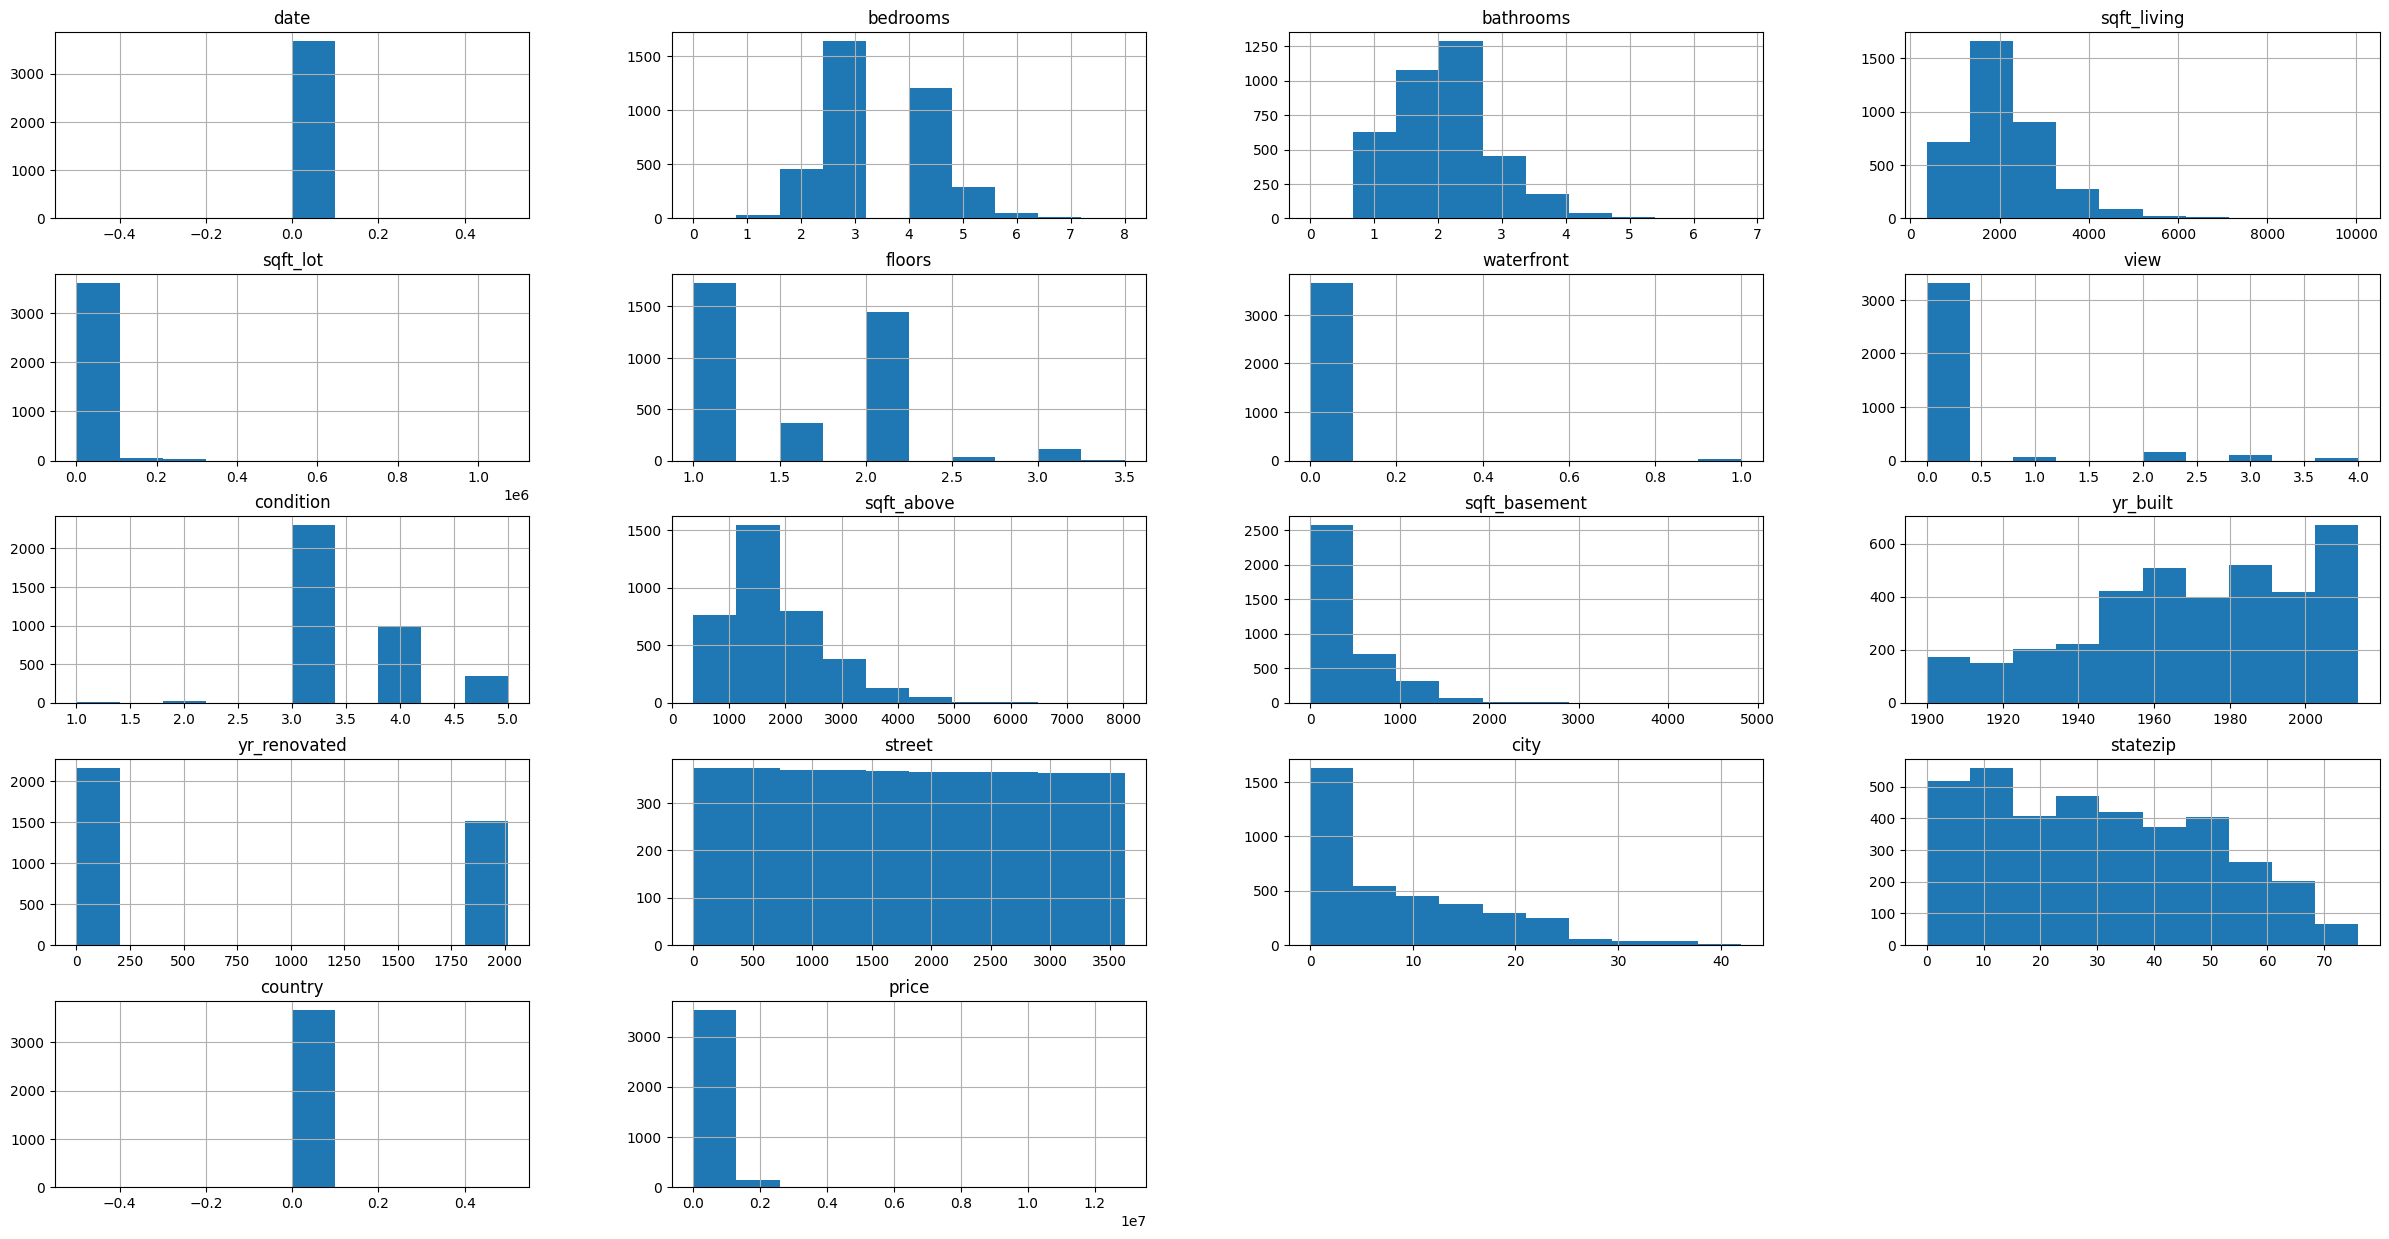

In [406]:
train_data.hist(figsize =(30,15))

<Axes: >

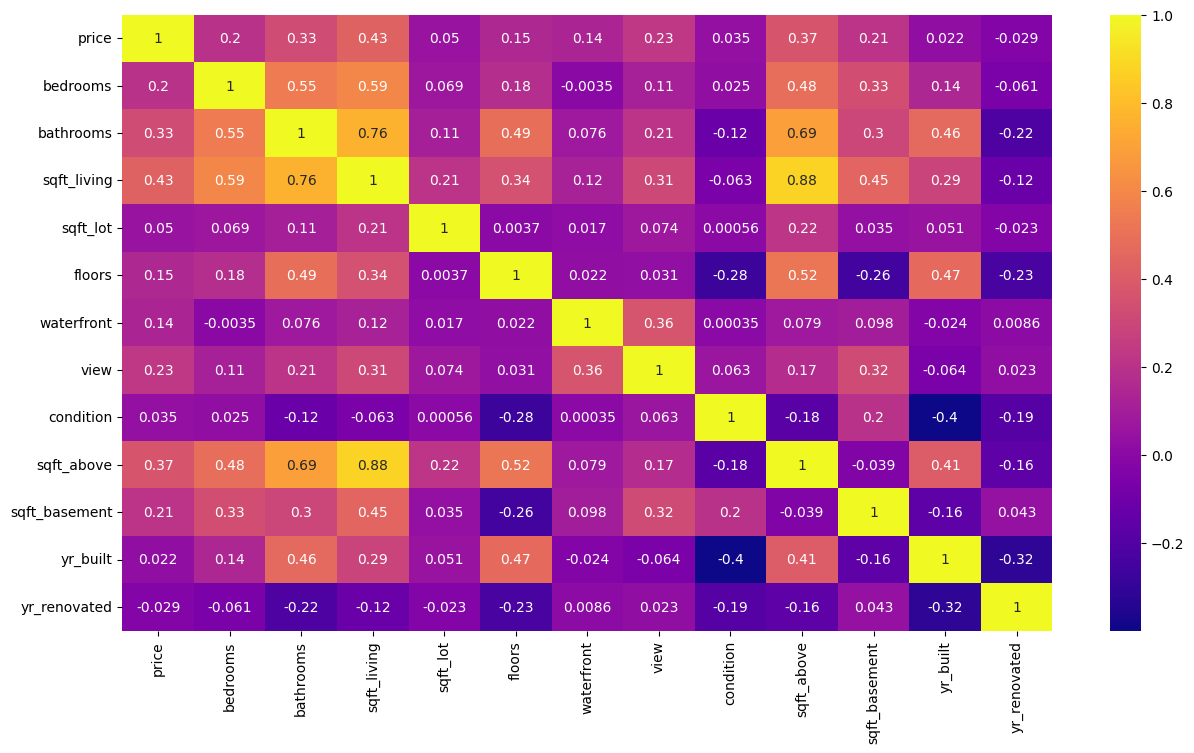

In [407]:
numeric_columns = house.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma")


In [408]:
train_data['sqft_lot'] = np.log(train_data['sqft_lot']+1)
train_data['floors'] = np.log(train_data['floors']+1)
train_data['waterfront'] = np.log(train_data['waterfront']+1)
train_data['view'] = np.log(train_data['view']+1)


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'statezip'}>],
       [<Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

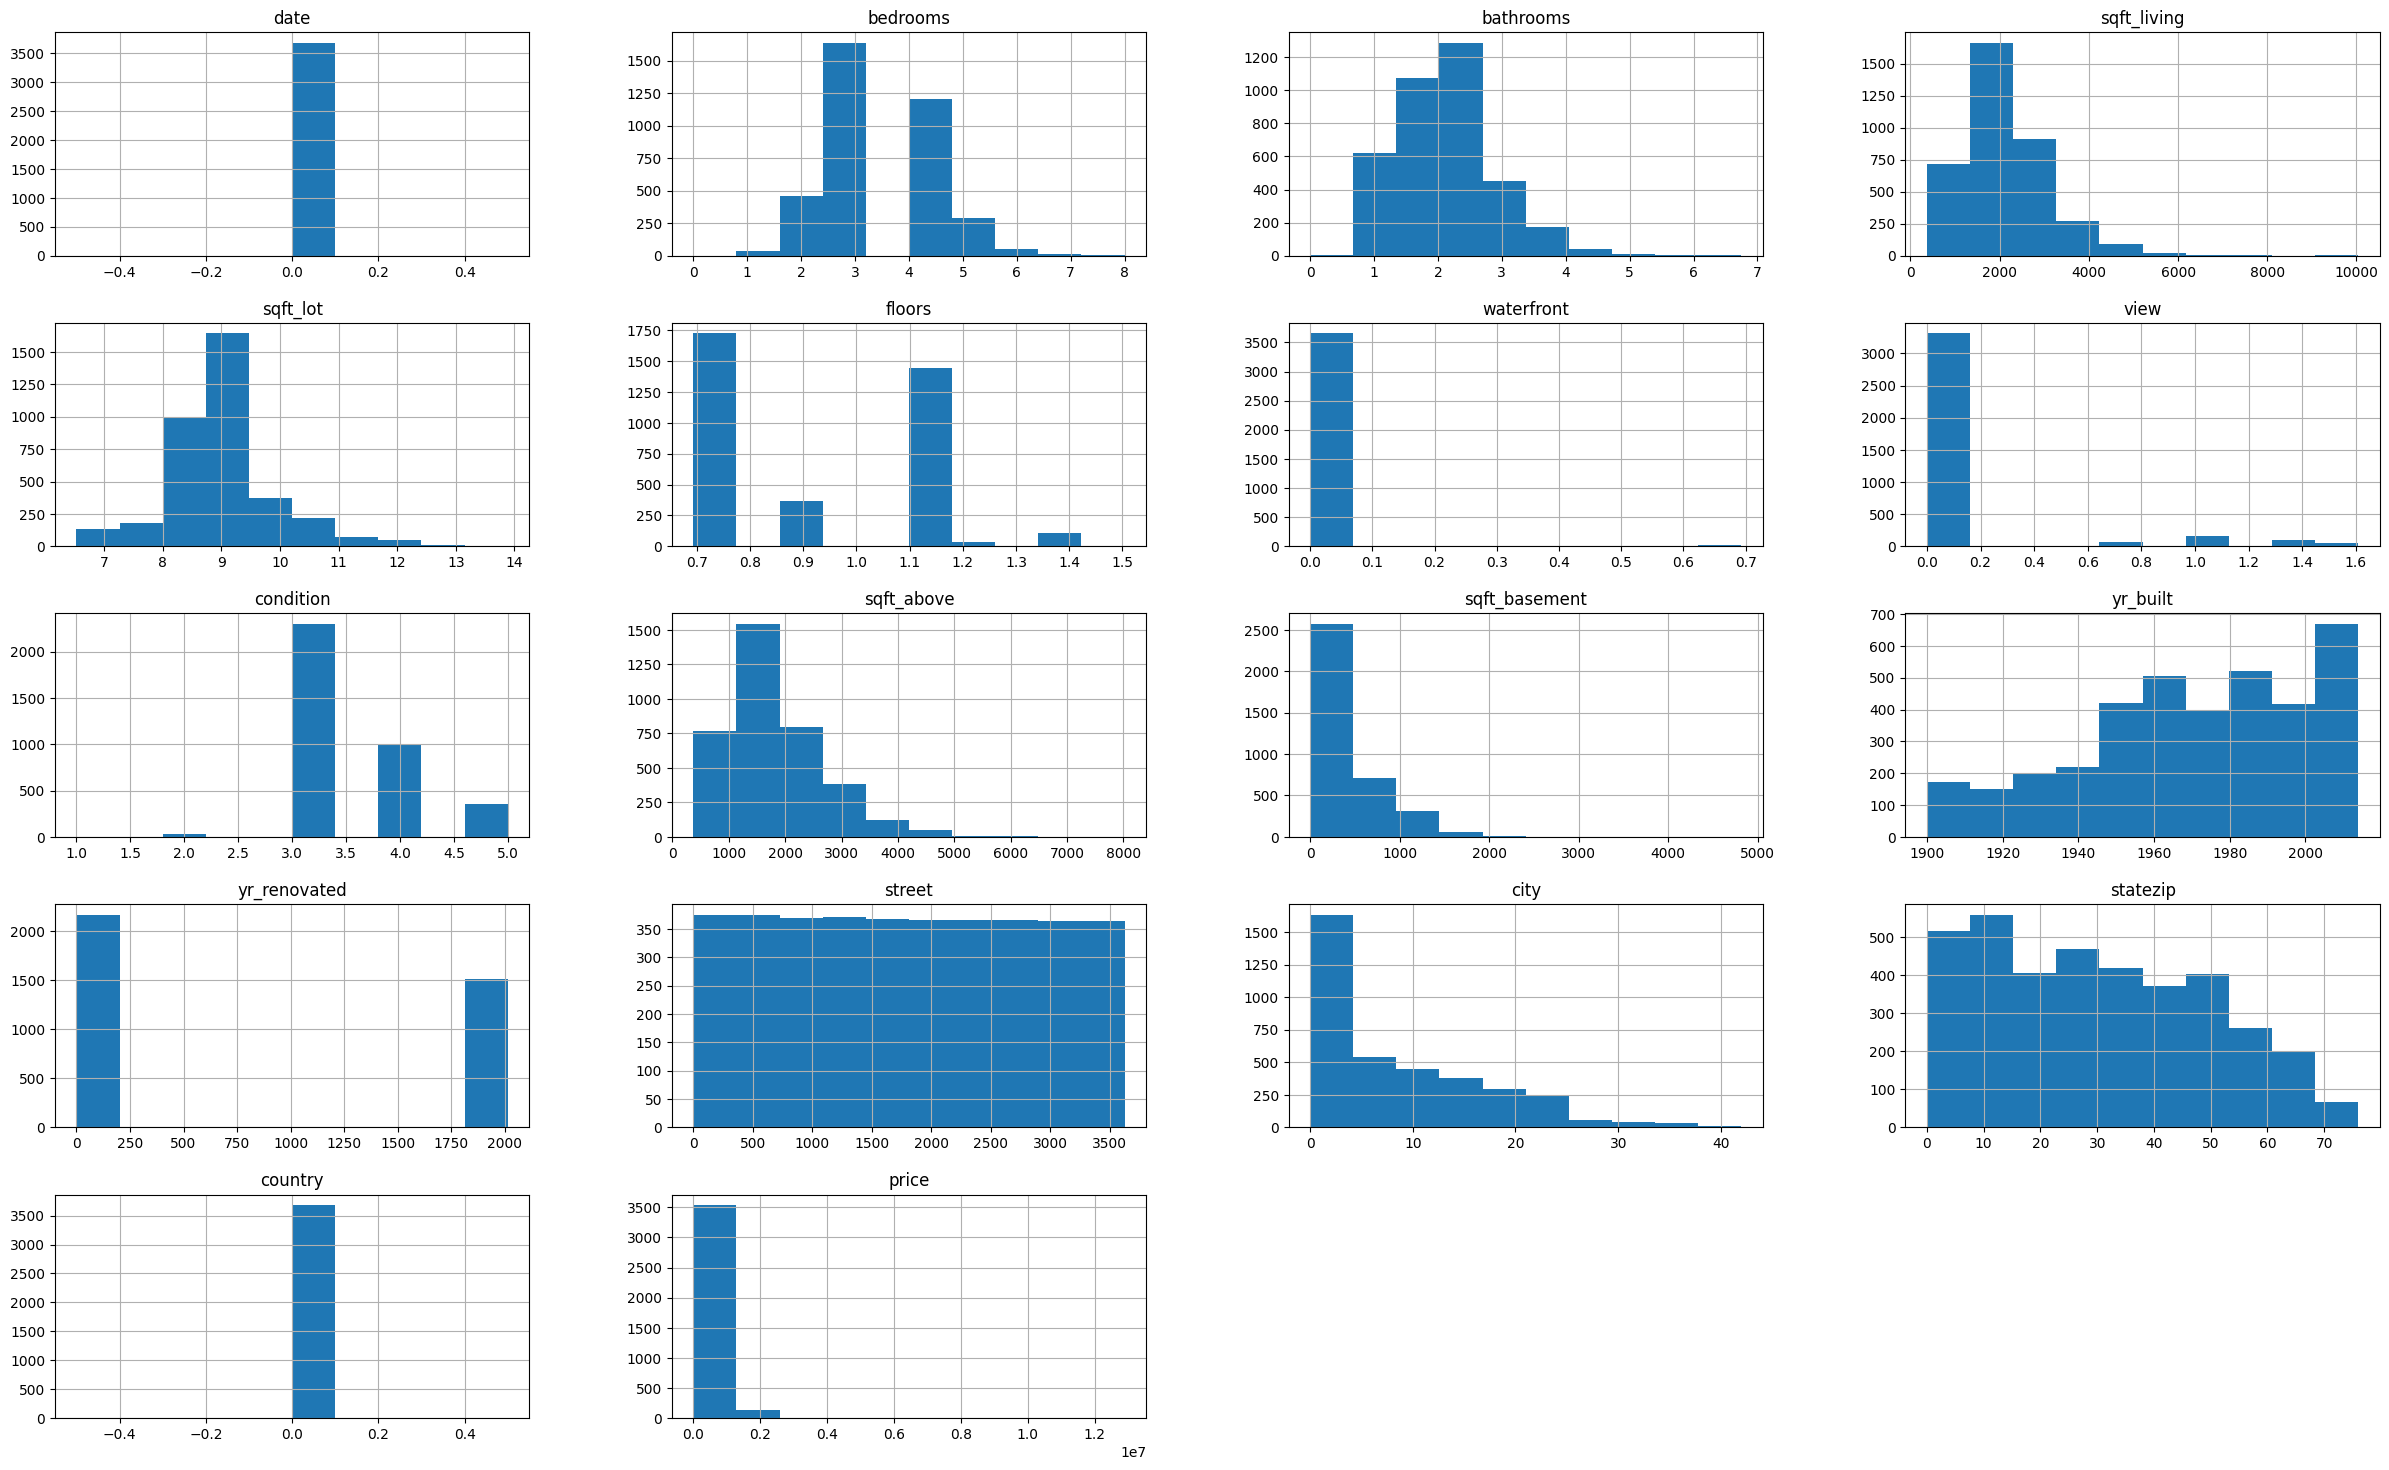

In [409]:
train_data.hist(figsize = (30,18))

In [411]:
train_data.sqft_living.value_counts()
# print(train_data.columns)

sqft_living
1150    27
1940    26
1840    26
1660    26
1010    25
        ..
1384     1
3305     1
5070     1
3210     1
2331     1
Name: count, Length: 524, dtype: int64

In [412]:
train_data = train_data.join(pd.get_dummies(train_data.sqft_living)).drop(['sqft_living'],axis=1)

<Axes: >

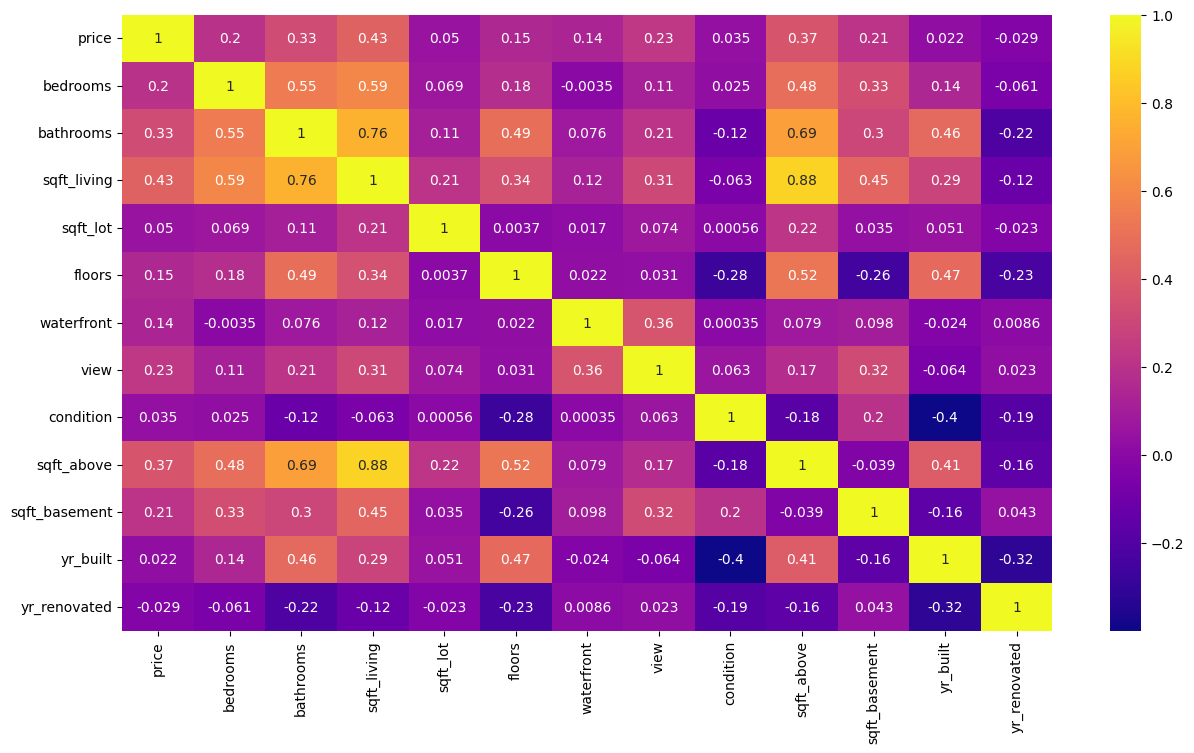

In [413]:
numeric_columns = house.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma")


<Axes: xlabel='bedrooms', ylabel='bathrooms'>

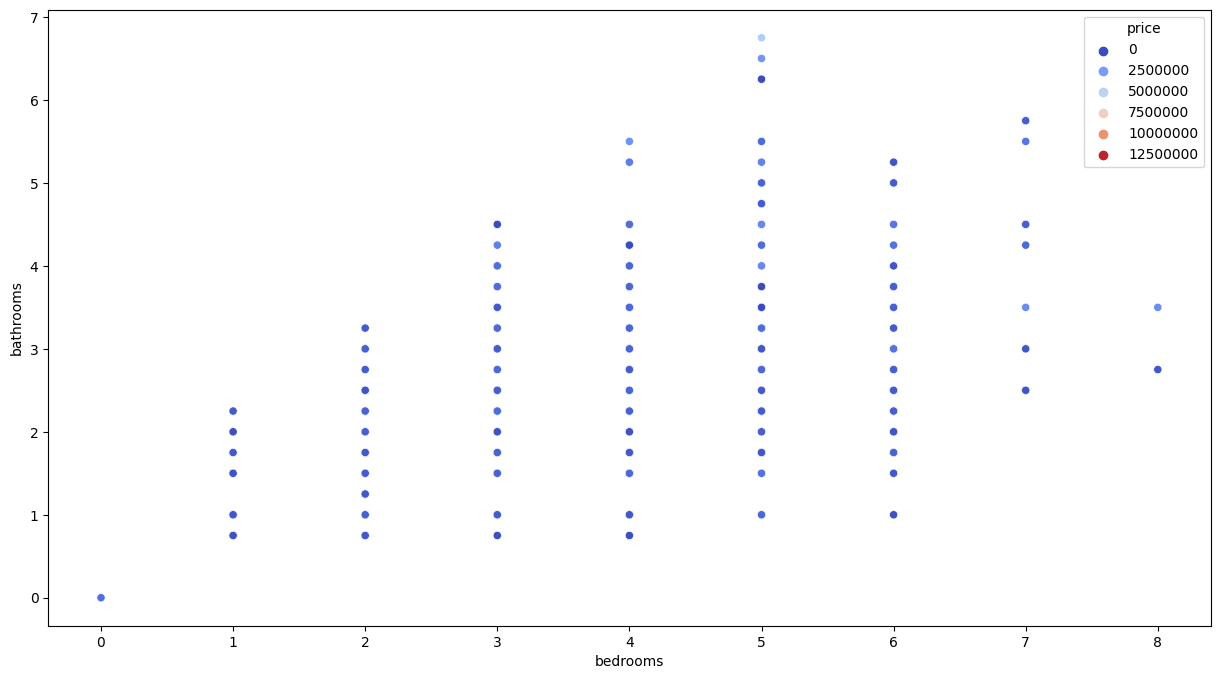

In [414]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'bedrooms', y = 'bathrooms',
 data = train_data, hue = 'price', palette = 'coolwarm')

In [415]:
# Assuming non_numeric_values is a pandas Series
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

non_numeric_values.index = x_train.index

# Now you can use the boolean Series to filter the DataFrames
x_train = x_train[~non_numeric_values]
y_train = y_train[~non_numeric_values]

# Convert 'price' column to float
y_train = pd.to_numeric(y_train)
x_train_s = scaler.fit_transform(x_train)

# Fit the linear regression model
reg = LinearRegression()
reg.fit(x_train_s, y_train)

# Print the shape of x_train and y_train
print(x_train.shape)
print(y_train.shape)


(3680, 17)
(3680,)


In [416]:
test_data = x_test.join(y_test)

test_data['sqft_lot'] = np.log(test_data['sqft_lot']+1)
test_data['floors'] = np.log(test_data['floors']+1)
test_data['waterfront'] = np.log(test_data['waterfront']+1)
test_data['view'] = np.log(test_data['view']+1)

test_data = test_data.join(pd.get_dummies(test_data.sqft_living)).drop(['sqft_living'],axis=1)

# x_test = x_test[~non_numeric_values]
# y_test = y_test[~non_numeric_values]

# # # Convert 'price' column to float
# # y_test = pd.to_numeric(y_test)




In [417]:

non_numeric_columns = x_test.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)
# Convert 'date' column to int64
x_test['date'] = pd.to_datetime(x_test['date']).astype(np.int64) // 10**9

# Encode 'street' column with numerical labels
x_test['street'] = pd.factorize(x_test['street'])[0]

# Convert 'city' column to int
x_test['city'] = pd.factorize(x_test['city'])[0]

# Convert 'state' column to int
x_test['statezip'] = pd.factorize(x_test['statezip'])[0]

# Convert 'zip code' column to int
x_test['country'] = pd.factorize(x_test['country'])[0]





Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')


In [418]:
test_data

,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,5420,5430,5480,5860,5940,5990,6040,6980,7320,13540
486,2014-05-12 00:00:00,4.0,2.50,8.503297,1.098612,0.0,0.000000,3,2890,90,...,False,False,False,False,False,False,False,False,False,False
3206,2014-06-24 00:00:00,4.0,1.75,8.249575,0.916291,0.0,0.000000,5,1820,500,...,False,False,False,False,False,False,False,False,False,False
811,2014-05-16 00:00:00,3.0,2.00,8.801168,0.693147,0.0,1.098612,4,1220,1000,...,False,False,False,False,False,False,False,False,False,False
1948,2014-06-05 00:00:00,5.0,3.00,8.466110,0.693147,0.0,0.000000,3,1450,990,...,False,False,False,False,False,False,False,False,False,False
2488,2014-06-13 00:00:00,4.0,2.50,9.238539,0.693147,0.0,1.609438,3,1700,720,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2014-05-29 00:00:00,4.0,3.50,9.516869,0.916291,0.0,0.000000,5,4270,460,...,False,False,False,False,False,False,False,False,False,False
3360,2014-06-25 00:00:00,4.0,2.75,8.639588,0.693147,0.0,1.098612,3,1330,980,...,False,False,False,False,False,False,False,False,False,False
915,2014-05-19 00:00:00,4.0,2.50,8.343078,1.098612,0.0,0.000000,3,2460,0,...,False,False,False,False,False,False,False,False,False,False
3722,2014-07-01 00:00:00,3.0,2.25,8.267962,1.098612,0.0,0.000000,3,1640,0,...,False,False,False,False,False,False,False,False,False,False


In [419]:
x_test_s = scaler.transform(x_test)

In [420]:
reg.score(x_test_s, y_test)

0.04243001351242148

In [421]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)


RandomForestRegressor()

In [422]:
forest.score(x_test_s, y_test)

0.04475946930229846

In [427]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [100, 200, 300],
    "min_samples_split" : [2, 4],
    "max_depth" : [None, 4,8],
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
    scoring = "neg_mean_squared_error",
    return_train_score = True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [428]:
# best_forest = 
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [429]:
best_forest.score(x_test_s, y_test)

0.044920842202885836

In [430]:
print (reg.intercept_)
print (reg.coef_)

546936.9025711081
[ 0.00000000e+00 -5.33562173e+04  3.38885696e+04 -1.98124495e+18
 -1.41509743e+04  1.81760936e+04  3.55026223e+04  3.09743897e+04
  1.62565751e+04  1.78101377e+18  9.61641719e+17 -6.65406980e+04
  8.24449413e+03  2.30184808e+03 -5.25080829e+04  2.37937883e+04
  0.00000000e+00]


In [358]:
# price = -29353.665566604235+271.49800999*1000

# lr.predict([[3650,9050,2,2.5,5,]])




In [357]:
# plt.scatter(price,lr.predict([[1340,7912,1.5,3,1.5]]))

In [356]:
# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(y_test, lr.predict(x_test))
# rmse = np.sqrt(mse)
# print(rmse)




# Predicted price 
